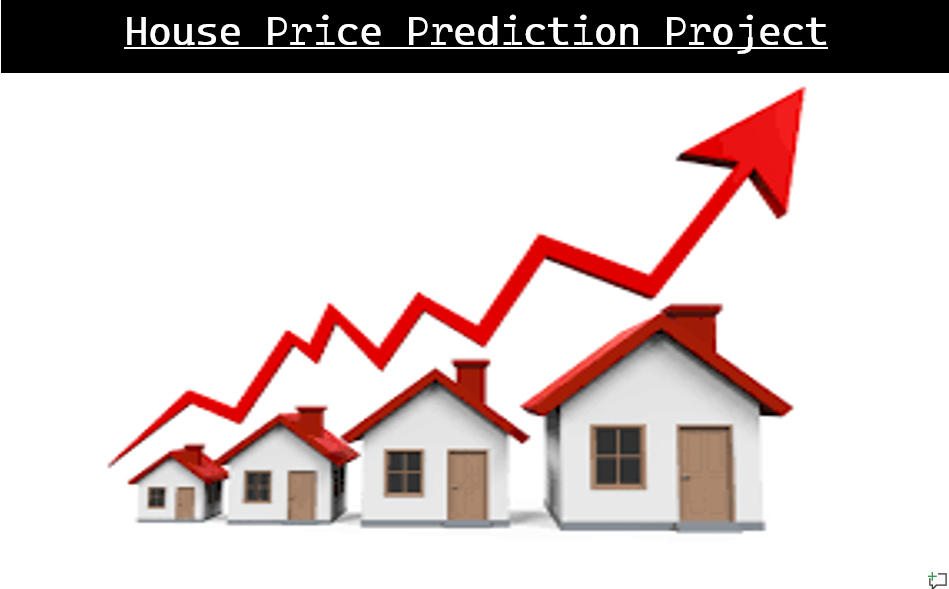

# **Introduction About the Project**
    Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

    Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

# ✨Importing Useful Libraries✨

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Loading Data

In [7]:
test = "C:\\Users\\negid\\Desktop\\BRILLICA SERVICES (Data Analytics)\\Machine Learning\\Data Set\\msc_testing_dataset.csv"
train = "C:\\Users\\negid\\Desktop\\BRILLICA SERVICES (Data Analytics)\\Machine Learning\\Data Set\\msc_training_dataset.csv"

In [8]:
test = pd.read_csv(test)
train = pd.read_csv(train)

# Cleanig the data

In [10]:
train.shape

(3000, 12)

In [11]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [12]:
# Checking the null values
train.isna().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

In [13]:
# Checking the data types of columns
train.dtypes

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object

In [14]:
# checking the uniqueness of data
train.nunique()

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           856
dtype: int64

In [15]:
# Checking the duplicate value in table
train.duplicated().sum()

488

In [16]:
# delete the duplicate rows from the table
train.drop_duplicates(inplace = True)

In [17]:
train.duplicated().sum()

0

In [18]:
# Showing complete information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          2512 non-null   int64
 1   bathroom      2512 non-null   int64
 2   kitchen       2512 non-null   int64
 3   french_door   2512 non-null   int64
 4   backyard      2512 non-null   int64
 5   furnished     2512 non-null   int64
 6   green_paint   2512 non-null   int64
 7   solar_power   2512 non-null   int64
 8   woodfloor     2512 non-null   int64
 9   qlm_security  2512 non-null   int64
 10  club_access   2512 non-null   int64
 11  price         2512 non-null   int64
dtypes: int64(12)
memory usage: 255.1 KB


In [19]:
# Describing the data
train.describe()       # It Describe the statistics Five number Summary

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,2.991242,1.495223,1.510748,2.001194,0.49164,0.492834,0.490446,0.493232,0.508758,0.486863,0.501194,8609.211783
std,1.424568,0.500077,0.499984,0.813809,0.50003,0.500048,0.500008,0.500054,0.500023,0.499927,0.500098,2222.006893
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10197.500000
max,5.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [20]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


# EDA (Exploratory Data Analysis)

In [22]:
pie = train.groupby("bathroom")["price"].mean().reset_index()
pie

,bathroom,price
0,1,8483.698738
1,2,8737.146302


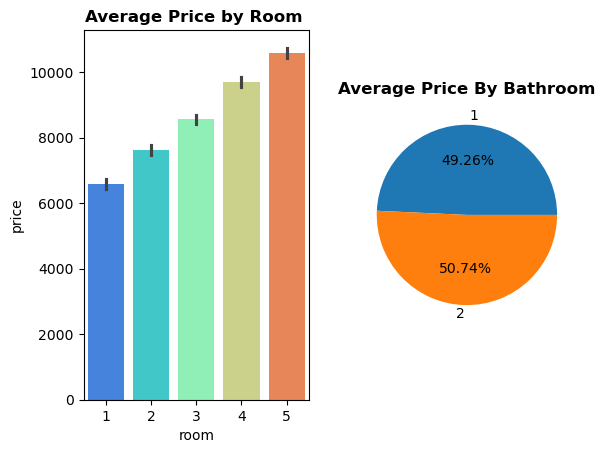

In [23]:
plt.subplot(1,2,1)
sns.barplot(data = train,x = "room", y = "price", palette = "rainbow")
plt.title("Average Price by Room ",fontweight = "bold")

plt.subplot(1,2,2)
plt.pie(pie["price"],labels = pie["bathroom"],autopct="%0.2f%%")
plt.title("Average Price By Bathroom",fontweight= "bold")
plt.show()

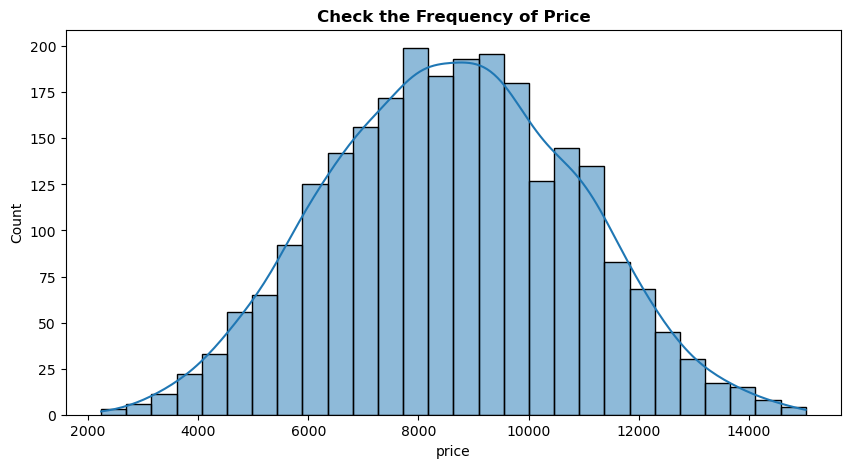

In [24]:
plt.figure(figsize = (10,5))
sns.histplot(data = train, x = "price",kde =True)
plt.title("Check the Frequency of Price",fontweight = "bold")
plt.show()

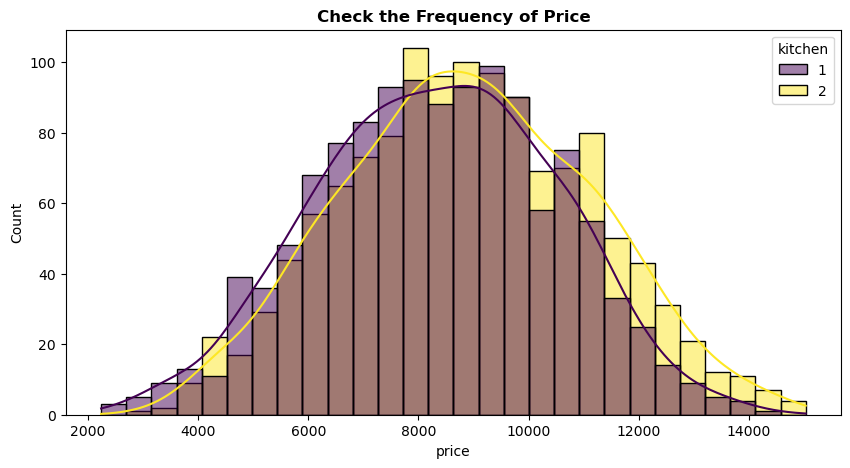

In [25]:
plt.figure(figsize = (10,5))
sns.histplot(data = train, x = "price",kde =1,hue="kitchen",palette="viridis")
plt.title("Check the Frequency of Price",fontweight = "bold")
plt.show()

In [26]:
train.nunique().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11
index,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,5,2,2,3,2,2,2,2,2,2,2,856


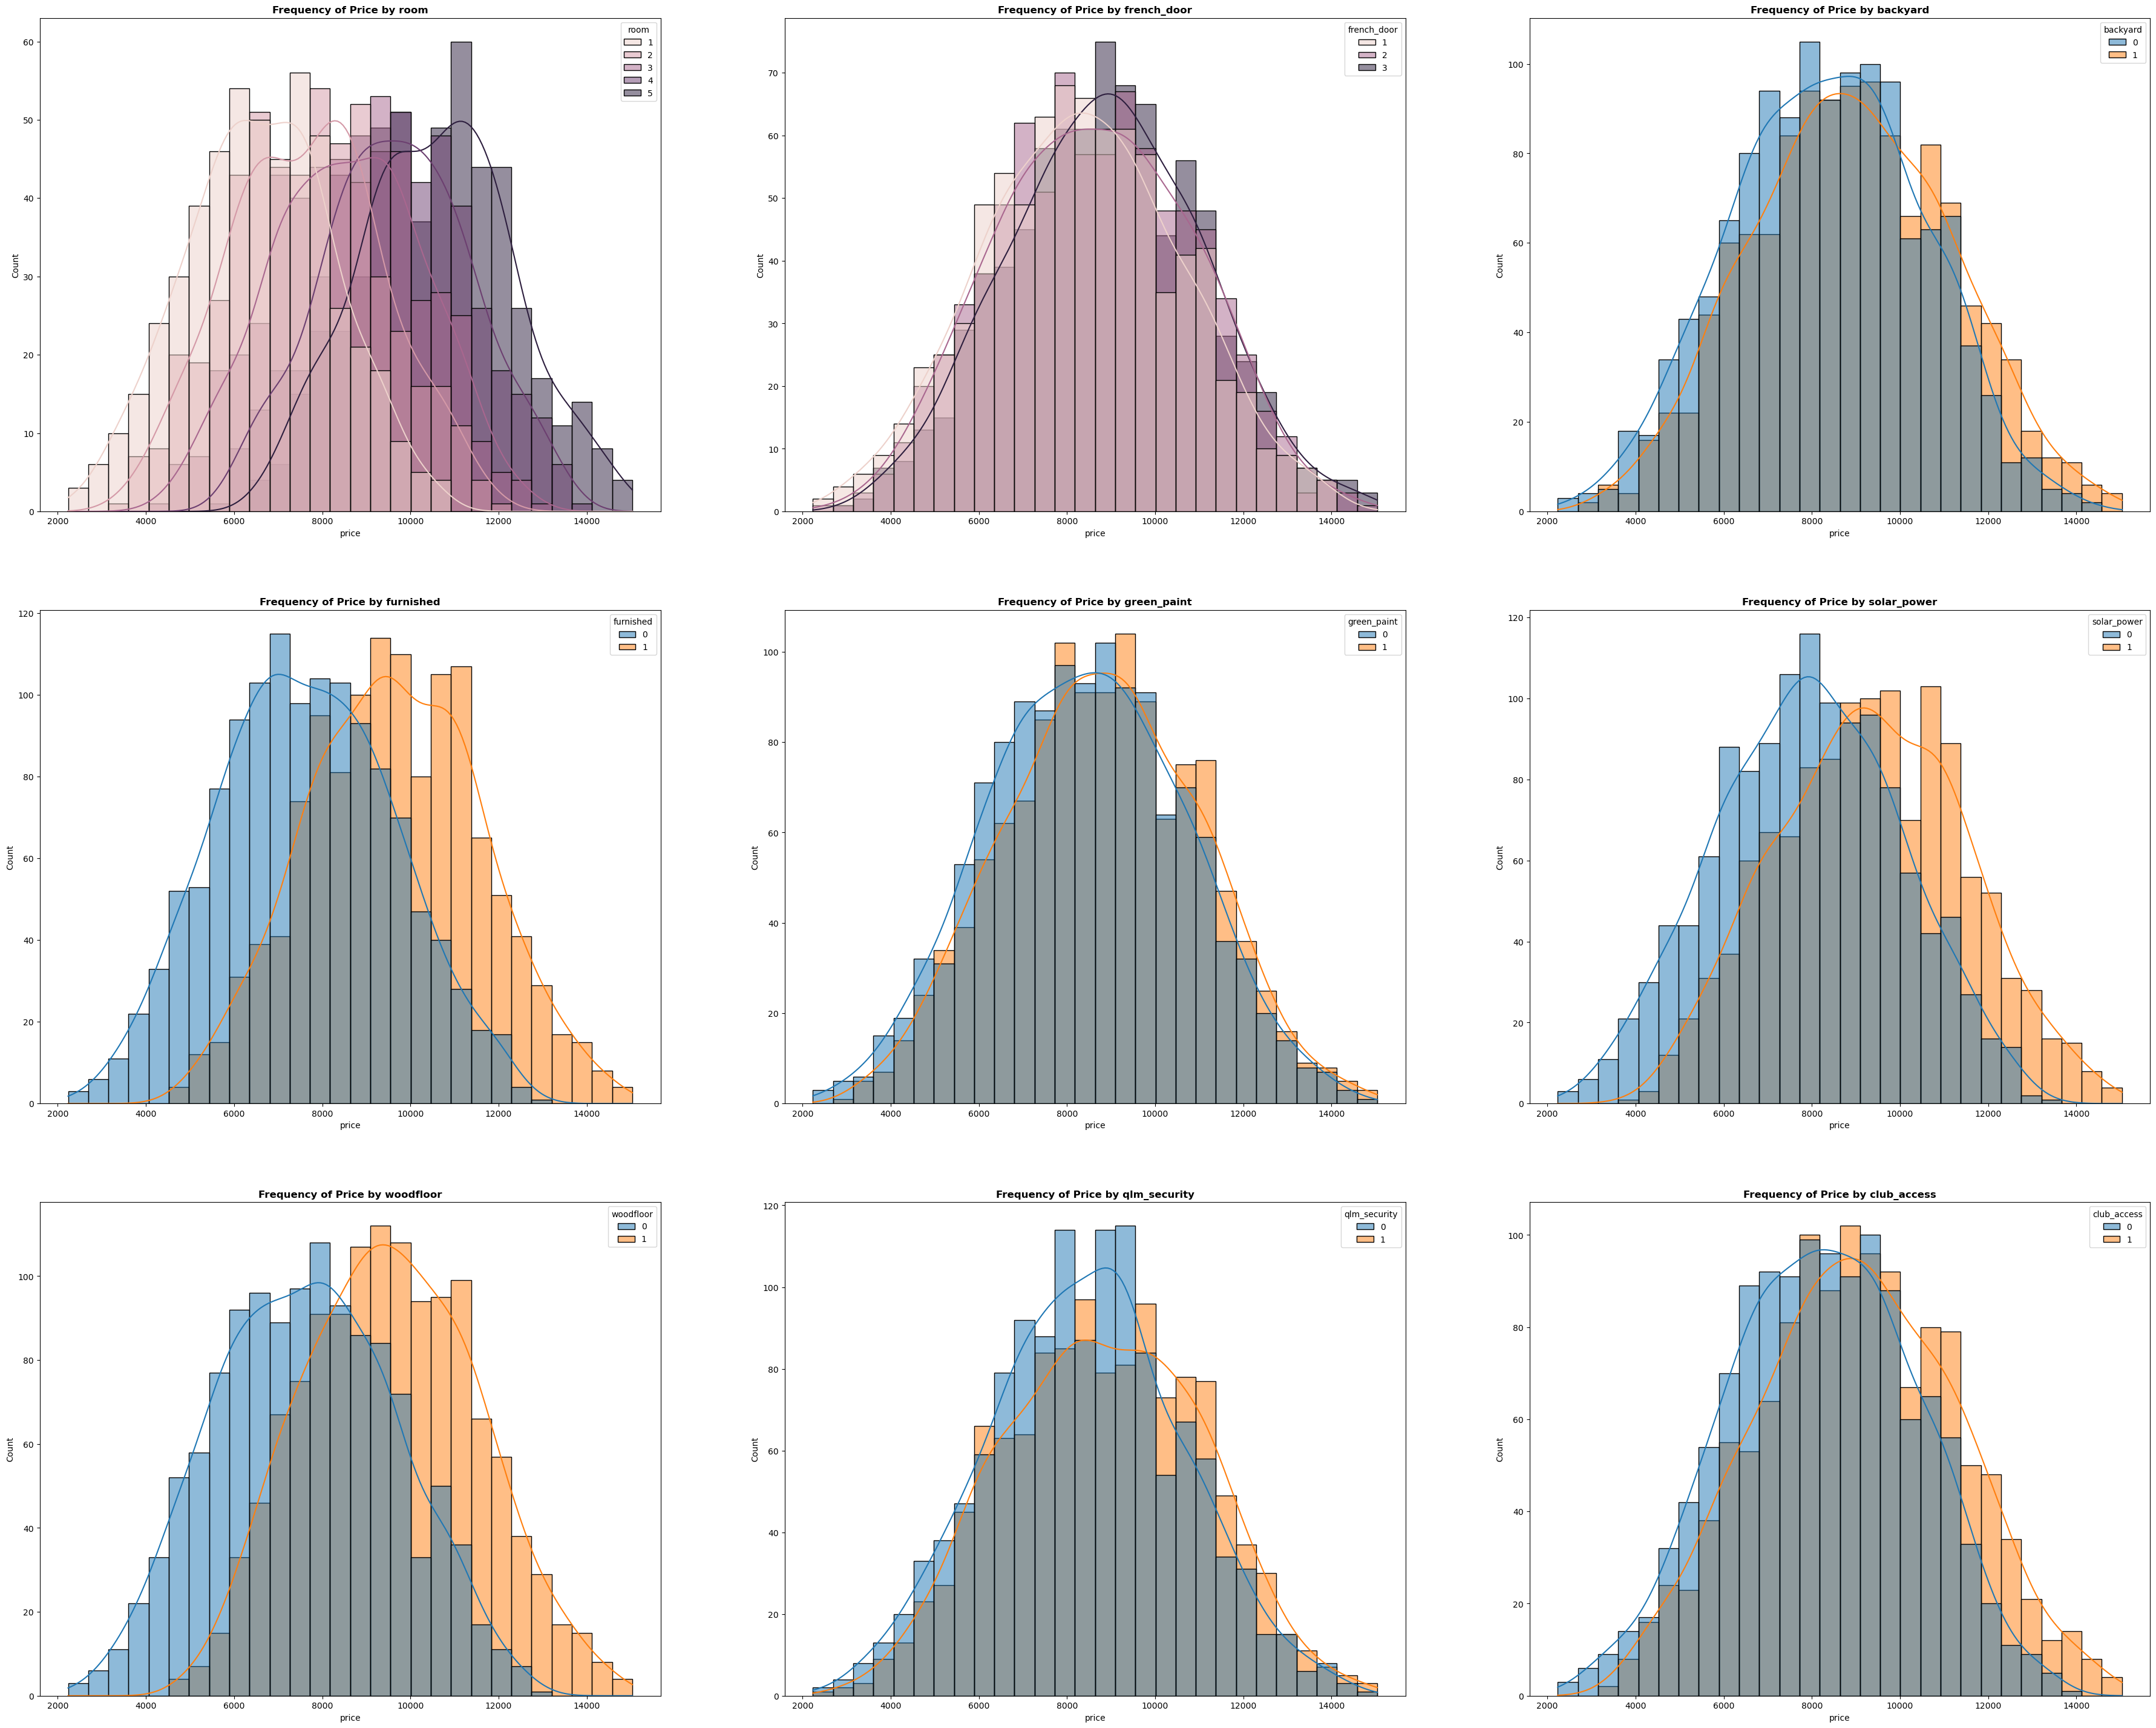

In [27]:
plt.figure(figsize=(45,36))
c = 1
for i in train:
    if i in ("bathroom","kitchen","price"):
        continue
    else:
        plt.subplot(3,3,c)
        sns.histplot(data = train, x="price",kde = 1,hue = i)
        plt.title(f"Frequency of Price by {i}",fontweight = "bold")
        c+=1
plt.show()

In [28]:
for i in train:
    if i == "price":
        continue
    else:
        print("_"*50)
        val = train[i].value_counts().reset_index()
        print(val)
        print("_"*50)

__________________________________________________
   room  count
0     2    517
1     5    515
2     1    509
3     3    488
4     4    483
__________________________________________________
__________________________________________________
   bathroom  count
0         1   1268
1         2   1244
__________________________________________________
__________________________________________________
   kitchen  count
0        2   1283
1        1   1229
__________________________________________________
__________________________________________________
   french_door  count
0            2    849
1            3    833
2            1    830
__________________________________________________
__________________________________________________
   backyard  count
0         0   1277
1         1   1235
__________________________________________________
__________________________________________________
   furnished  count
0          0   1274
1          1   1238
_________________________________

# Linear Regression Model

In [30]:
train.corr()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,0.007768,0.010197,0.009971,-0.005135,0.004384,-0.026955,-0.014619,0.015203,-0.016937,0.014549,0.644894
bathroom,0.007768,1.000000,-0.014926,0.000503,-0.002549,-0.004915,0.023708,-0.021629,-0.003018,-0.023349,-0.013513,0.057040
kitchen,0.010197,-0.014926,1.000000,-0.016181,0.000360,0.009069,-0.017909,0.006663,-0.005952,0.024464,0.006320,0.122473
french_door,0.009971,0.000503,-0.016181,1.000000,-0.007315,0.003446,0.004432,0.009317,0.008293,-0.022965,-0.008321,0.096599
backyard,-0.005135,-0.002549,0.000360,-0.007315,1.000000,0.000557,0.000477,0.002959,0.013832,-0.021150,-0.023849,0.123133
furnished,0.004384,-0.004915,0.009069,0.003446,0.000557,1.000000,0.044325,-0.016917,0.001844,-0.021883,0.019941,0.453719
green_paint,-0.026955,0.023708,-0.017909,0.004432,0.000477,0.044325,1.000000,-0.005833,-0.006037,0.000294,-0.008714,0.079985
solar_power,-0.014619,-0.021629,0.006663,0.009317,0.002959,-0.016917,-0.005833,1.000000,-0.013301,0.002830,-0.006338,0.320911
woodfloor,0.015203,-0.003018,-0.005952,0.008293,0.013832,0.001844,-0.006037,-0.013301,1.000000,0.026747,0.002347,0.435437
qlm_security,-0.016937,-0.023349,0.024464,-0.022965,-0.021150,-0.021883,0.000294,0.002830,0.026747,1.000000,0.020771,0.090566


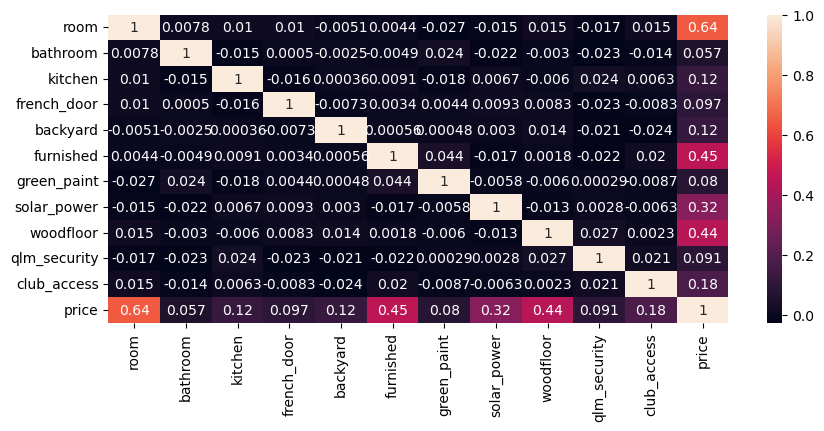

In [31]:
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(),annot = True)
plt.show()

In [32]:
x_train = train.drop(columns = "price")
y_train = train[["price"]]

In [33]:
x_test= test.drop(columns = "price")
y_test = test[["price"]]

# Building the Machine learning Algorithm

In [35]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [36]:
ac = linear.score(x_train,y_train)
print("Accuracy of Training Data Set :",ac)

Accuracy of Training Data Set : 1.0


In [37]:
ac2 = linear.score(x_test,y_test)
print("Accuracy of Testing Data Set :",ac2)

Accuracy of Testing Data Set : 0.9999656095212318


In [38]:
pred = linear.predict(x_test)

In [39]:
pred.T

array([[ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
         7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
         8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
         9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
        10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
         6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
         9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
         6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
        12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
         4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
         8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
         7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
        11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
         5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165., 

In [40]:
mse = mean_squared_error(pred,y_test)
print("Mean Squared Error of Testing Data Set is",mse)

Mean Squared Error of Testing Data Set is 169.00000000001555


In [41]:
mae = mean_absolute_error(pred,y_test)
print("Mean Absolute Error Of testing data Set is",mae)

Mean Absolute Error Of testing data Set is 13.000000000000597
